In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
df_train = pd.read_csv('../data/train_users.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [4]:
len(df_train.date_first_booking.dropna())

88908

In [5]:
len(df_train.loc[df_train.country_destination != 'NDF'])

88908

In [6]:
#df_train = df_train.drop(columns = ['date_first_booking'], axis = 1)

DatetimeIndex

In [7]:
#df_train['date_account_created'] = pd.to_datetime(date_account_created, format='%Y-%m-%d', errors='ignore')
df_train['account_created_year'] = pd.DatetimeIndex(df_train['date_account_created']).year
df_train['account_created_month'] = pd.DatetimeIndex(df_train['date_account_created']).month
df_train['account_created_day'] = pd.DatetimeIndex(df_train['date_account_created']).day
df_train = df_train.drop(['date_account_created'], axis = 1)

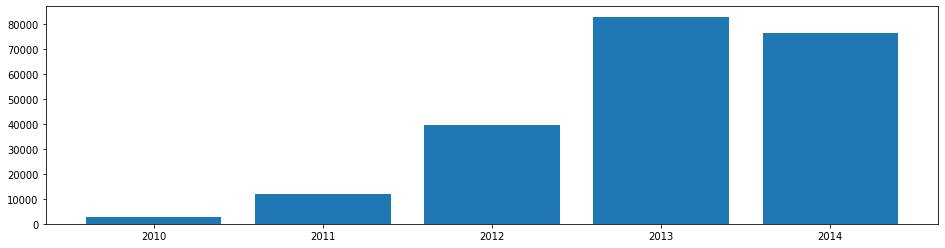

In [8]:
y = df_train.groupby('account_created_year').size()
x = y.index

plt.figure(figsize=(16,4))
plt.bar(x, y)
plt.show()

df.groupby().size()

In [9]:
year_month = df_train.groupby(['account_created_year', 'account_created_month']).size()

In [10]:
from collections import defaultdict

defaultdict(lambda :) -> lambda 작성하는 법

In [11]:
account_year_month = defaultdict(lambda: [-1 for x in range(13)])
for idx, val in zip(year_month.index, year_month):
    year = idx[0]
    month = idx[1]
    account_year_month[year][month] = val

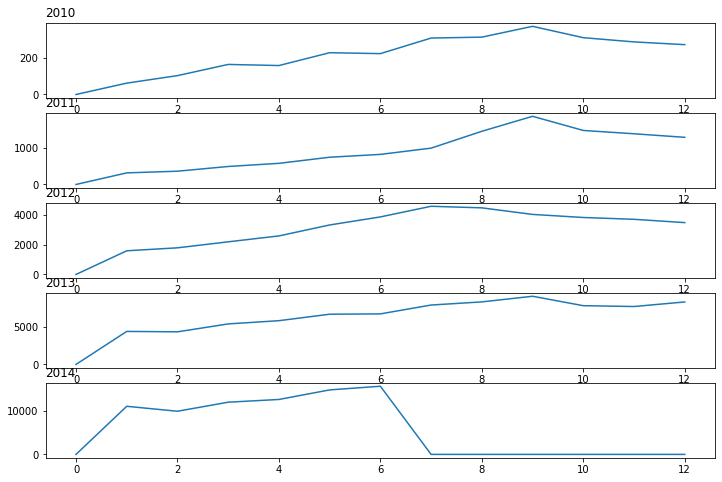

In [40]:
fig, axes = plt.subplots(len(account_year_month.keys()), 1)

for year, ax in zip(account_year_month.keys(), axes):
    
    vals = account_year_month[year]
    start = next(x for x, val in enumerate(vals) if val != -1)
    end = next(x for x, val in enumerate(vals[::-1]) if val != -1)
    
    start = start if start != 0 else 1
    end = end if end != 0 else 13

    ax.plot([m for m in range(len(vals))], vals)
    ax.set_title(year, loc = 'left')

In [13]:
def draw_line_plot(data):
    
    for year in data.keys():
        start = next(x for x, val in enumerate(data[year]) if val != -1)
        end = next(x for x, val in enumerate(data[year][::-1]) if val != -1)

        start = start if start != 0 else 1
        end = end if end != 0 else 13
        
        plt.plot([x for x in range(start, end)], data[year][start:end], label = year)
    
    plt.xticks([x for x in range(start, end)])

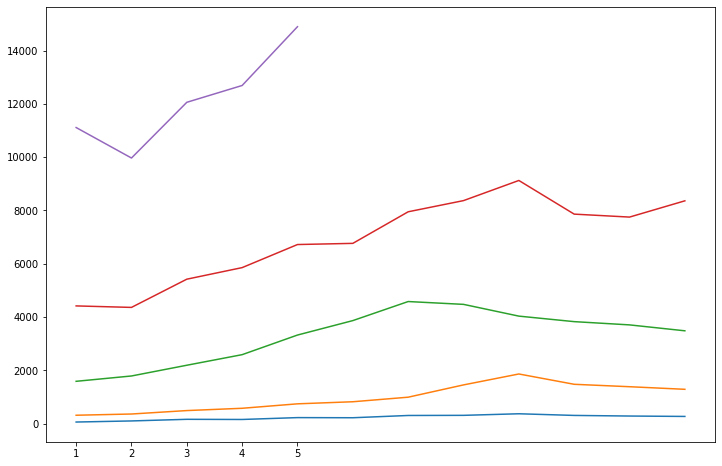

In [39]:
draw_line_plot(account_year_month)

In [190]:
activation = pd.DataFrame(df_train.groupby(['account_created_year', 'account_created_month']).size())
activation = activation.rename(columns = {0:'number_of_users'})

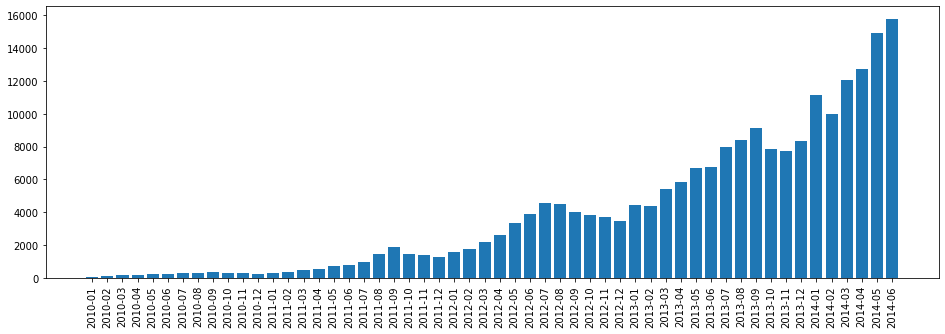

In [229]:
plt.figure(figsize=(16, 5))  
x = ['{}-{:02}'.format(y, m) for (y, m) in activation.index]
y = activation['number_of_users']
plt.bar(x, y)
plt.xticks(rotation = 90)
plt.show()

In [15]:
y = df_train.age.dropna().value_counts()
x = y.index

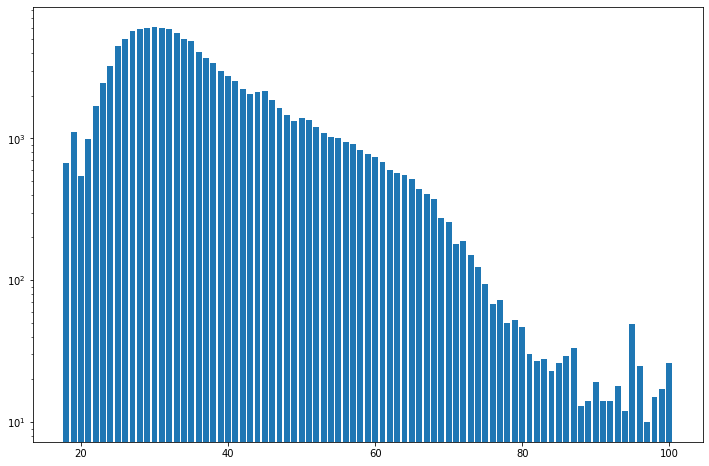

In [38]:
plt.bar(x, y)
plt.yscale("log")

use of loc

In [17]:
age_mask = df_train.age > 1000
df_train.loc[age_mask, 'age'] = 2015 - df_train.loc[age_mask, 'age']

In [18]:
df_train.loc[(df_train.age > 100) | (df_train.age < 18), 'age'] = -1
df_train.age.fillna(-1, inplace = True)

In [19]:
y = df_train.loc[df_train.age != -1, 'age'].value_counts()
x = y.index

<BarContainer object of 83 artists>

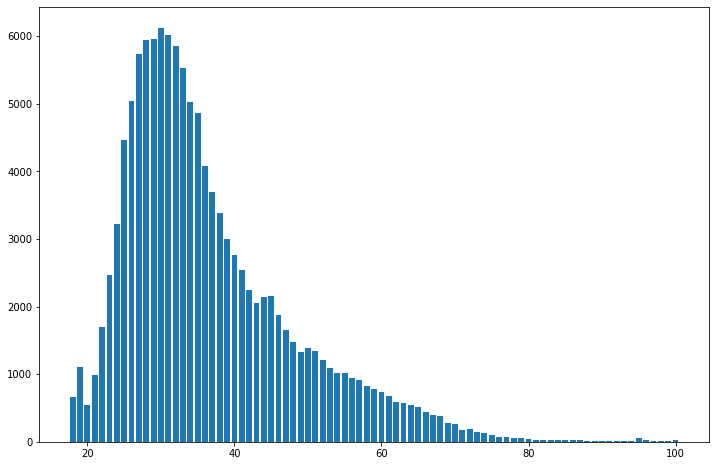

In [37]:
plt.bar(x, y)

In [21]:
df_train.gender.value_counts(normalize = True)

-unknown-    0.448290
FEMALE       0.295342
MALE         0.255047
OTHER        0.001321
Name: gender, dtype: float64

In [22]:
age_mask = (df_train.age > 18) & (df_train.age < 100)

In [23]:
male_age = df_train.loc[(age_mask & (df_train.gender == 'MALE')), 'age']
female_age = df_train.loc[(age_mask & (df_train.gender == 'FEMALE')), 'age']

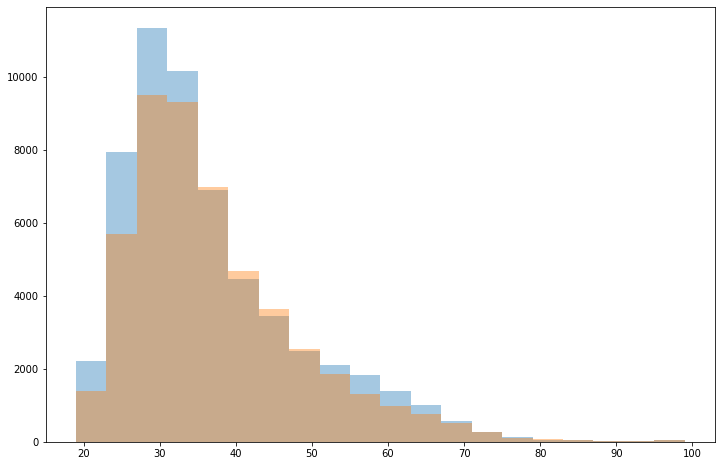

In [35]:
plt.hist(female_age, bins = 20, alpha = 0.4, label = 'Female')
plt.hist(male_age, bins = 20, alpha = 0.4, label = 'Male')
plt.show()

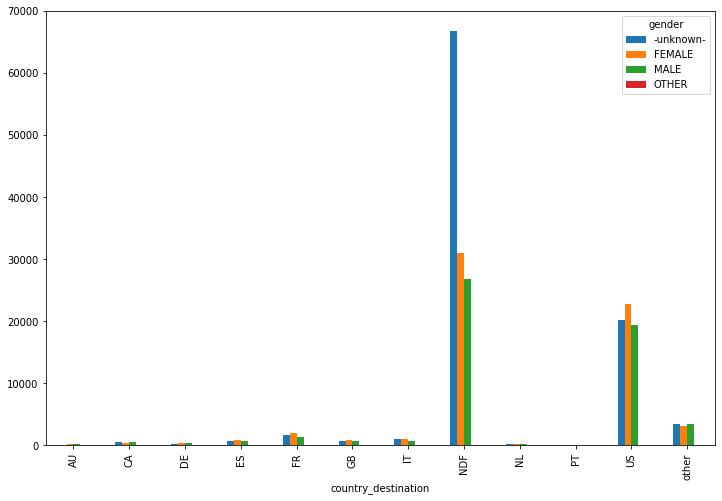

In [36]:
pd.crosstab(df_train['country_destination'], df_train['gender']).plot.bar()

In [26]:
from collections import defaultdict

In [31]:
gender_country = defaultdict(list)
for gender in df_train.gender.unique():
    gender_country[gender] = df_train.loc[df_train.gender == gender, 'country_destination'].value_counts()

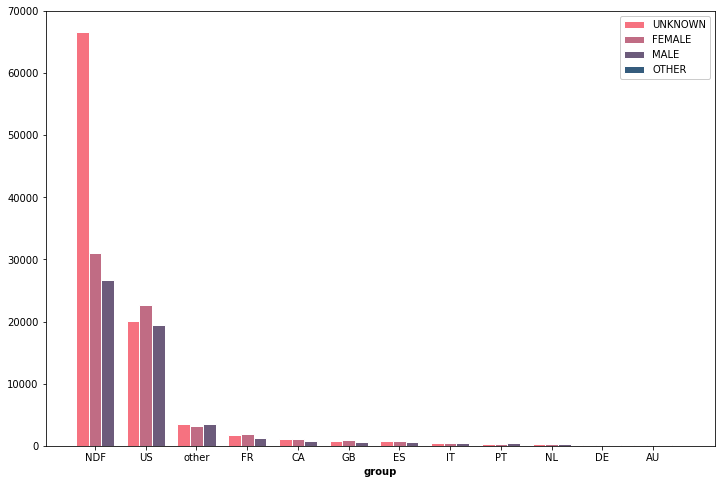

In [41]:
barWidth = 0.25

colors = ['#0F4C81', '#F5B895', '#77202F', '#E38690']


r1 = np.arange(len(gender_country['-unknown-']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, gender_country['-unknown-'], color='#F67280', width=barWidth, edgecolor='white', label='UNKNOWN')
plt.bar(r2, gender_country['FEMALE'], color='#C06C84', width=barWidth, edgecolor='white', label='FEMALE')
plt.bar(r3, gender_country['MALE'], color='#6C5B7B', width=barWidth, edgecolor='white', label='MALE')
plt.bar(r4, gender_country['OTHER'] , color='#355C7D', width=barWidth, edgecolor='white', label='OTHER')

plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(gender_country['FEMALE']))], df_train.country_destination.unique())
plt.legend(framealpha=1, frameon=True);
plt.show()

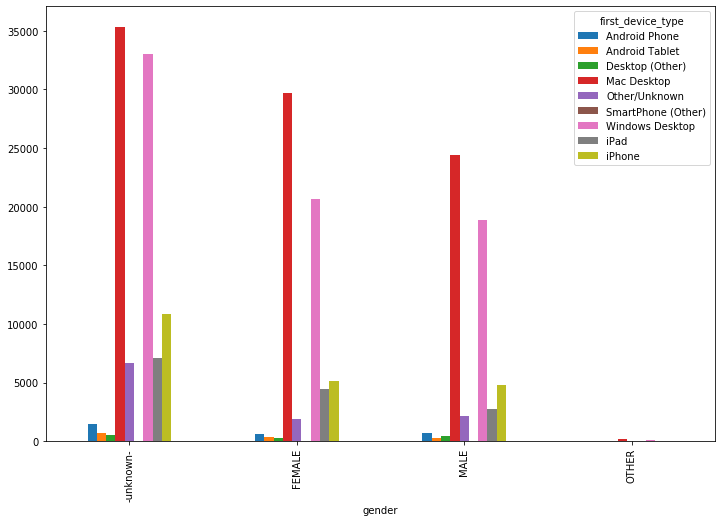

In [42]:
pd.crosstab(df_train.gender, df_train.first_device_type).plot.bar()

In [231]:
df_train.affiliate_channel.unique()

array(['direct', 'seo', 'other', 'sem-non-brand', 'content', 'sem-brand',
       'remarketing', 'api'], dtype=object)

In [282]:
affi_channel_month = df_train.groupby(['account_created_year', 'account_created_month','affiliate_channel']).size().unstack()
affi_channel_month = affi_channel_month.fillna(0)

In [300]:
x = ['{}-{:02}'.format(y, m) for (y, m) in affi_channel_month.index]

In [292]:
channel_count = defaultdict(list)
for channel in affi_channel_month.columns:
    for m in range(len(affi_channel_month[channel])):
        count = affi_channel_month[channel][m]
        channel_count[channel].append(count) 

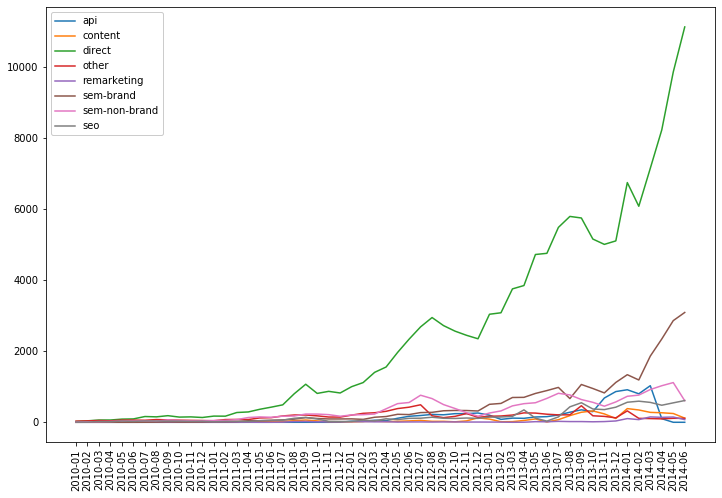

In [312]:
for channel in channel_count.keys():
    plt.plot(x, channel_count[channel], label = channel)
plt.xticks(rotation = 90)
plt.legend(framealpha=1, frameon=True);
plt.show()

Session Data

In [45]:
sessions = pd.read_csv('../data/sessions.csv')

In [46]:
sessions.head(4)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0


In [47]:
sessions = sessions.rename(columns = {'user_id':'id'})

In [48]:
sessions.head(4)

,id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0


In [53]:
booked_users_id = df_train.loc[pd.notnull(df_train.date_first_booking), 'id']

In [55]:
booked_users = sessions.loc[sessions.id.isin(booked_users_id)]
unbooked_users = sessions.loc[~sessions.id.isin(booked_users_id)]

In [61]:
booked_users.groupby('id').size().agg({
    'actions_total':np.sum,
    'actions_mean':np.mean,
    'actions_median':np.median,
    'actions_std':np.std,
    'actions_max':np.max,
    'actions_min':np.min
})

actions_total     2.480247e+06
actions_mean      8.619750e+01
actions_median    4.500000e+01
actions_std       1.252253e+02
actions_max       2.644000e+03
actions_min       1.000000e+00
dtype: float64

In [62]:
unbooked_users.groupby('id').size().agg({
    'actions_total':np.sum,
    'actions_mean':np.mean,
    'actions_median':np.median,
    'actions_std':np.std,
    'actions_max':np.max,
    'actions_min':np.min
})

actions_total     8.052994e+06
actions_mean      7.546687e+01
actions_median    4.000000e+01
actions_std       1.087861e+02
actions_max       2.722000e+03
actions_min       1.000000e+00
dtype: float64

In [105]:
_agg = booked_users.groupby('id')['secs_elapsed']

In [107]:
_agg